<a href="https://colab.research.google.com/github/Kafleavinash/Machinelearning_soil/blob/main/Antho_all_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
import shap
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [3]:
from google.colab import files
uploaded = files.upload()


Saving combined_excel_files _Final_Antho.csv to combined_excel_files _Final_Antho (1).csv


In [6]:
import pandas as pd

# Load CSV
df = pd.read_csv('/content/combined_excel_files _Final_Antho.csv')

# Check structure
df.head()
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SAMPLEDATE     528 non-null    object 
 1   lati           464 non-null    float64
 2   long           464 non-null    float64
 3   OM             528 non-null    float64
 4   Elevation      528 non-null    float64
 5   Relative_Elev  528 non-null    float64
 6   Slope          528 non-null    float64
 7   Aspect         527 non-null    float64
 8   Profile_curva  528 non-null    float64
 9   Tang_curva     528 non-null    float64
 10  Senti_BI_1     528 non-null    float64
 11  Senti_BI_2     528 non-null    float64
 12  Plant_BI_1     527 non-null    float64
 13  Plant_BI_2     527 non-null    float64
 14  Polaris_SC     530 non-null    float64
 15  Gnasco_SC      508 non-null    float64
 16  MRVBF          528 non-null    float64
 17  TWI            528 non-null    float64
 18  Clay_polar

In [7]:
# Drop the dependent variable from the dataset to get the features (X)
X = df.drop(columns=["OM"])  # <-- replace with actual column name if different

# Select the dependent variable (y)
y = df["OM"]


In [8]:
print("Independent Variables (X):")
print(X.head())

print("\nDependent Variable (y):")
print(y.head())


Independent Variables (X):
   SAMPLEDATE    lati    long   Elevation  Relative_Elev     Slope  \
0  2022-06-08  44.384 -94.121  301.890015       6.350006  0.226563   
1  2022-06-08  44.383 -94.121  300.839996       5.299988  1.450022   
2  2022-06-08  44.382 -94.121  300.109985       4.569977  1.114162   
3  2022-06-08  44.381 -94.121  298.589996       3.049988  0.143161   
4  2022-06-08  44.376 -94.121  300.179993       4.639984  2.481674   

       Aspect  Profile_curva  Tang_curva  Senti_BI_1  ...  Clay_polaris  \
0  288.504852      -0.031094   -0.042257  933.025207  ...     27.166994   
1  237.093048      -0.080120   -0.019543  930.634888  ...     28.195694   
2  224.984100      -0.061876   -0.037807  946.033813  ...     22.422928   
3   90.087471      -0.032168   -0.077811  909.583008  ...     29.726028   
4   33.235489       0.026937    0.043010  942.244690  ...     27.379025   

   SAND_Polaris  SILT_Polaris  BD_Polaris  PH_Polaris   rootznaws  pctearthmc  \
0     28.836914     

In [9]:
df_m.head()

,SAMPLEDATE,lati,long,OM,Elevation,Relative_Elev,Slope,Aspect,Profile_curva,Tang_curva,...,Clay_polaris,SAND_Polaris,SILT_Polaris,BD_Polaris,PH_Polaris,rootznaws,pctearthmc,ncci3all,aws_5_20s,aws_0_20s
0,2022-06-08,44.384,-94.121,4.79,301.890015,6.350006,0.226563,288.504852,-0.031094,-0.042257,...,27.166994,28.836914,39.752930,1.304839,6.389773,270.250000,80.625000,0.923500,30.398750,40.537502
1,2022-06-08,44.383,-94.121,6.39,300.839996,5.299988,1.450022,237.093048,-0.080120,-0.019543,...,28.195694,28.219883,40.168297,1.199444,6.616946,270.593750,80.312500,0.925719,30.609375,40.818752
2,2022-06-08,44.382,-94.121,5.19,300.109985,4.569977,1.114162,224.984100,-0.061876,-0.037807,...,22.422928,36.771484,37.483444,1.320234,6.390908,268.812500,81.562500,0.890437,29.766872,39.693752
3,2022-06-08,44.381,-94.121,4.10,298.589996,3.049988,0.143161,90.087471,-0.032168,-0.077811,...,29.726028,26.262230,39.414146,1.154647,7.064779,264.984375,84.296875,0.817703,27.923904,37.232815
4,2022-06-08,44.376,-94.121,5.89,300.179993,4.639984,2.481674,33.235489,0.026937,0.043010,...,27.379025,28.667805,39.604698,1.333652,6.185274,266.500000,92.500000,0.817500,27.660000,36.949997


In [10]:
df_m.shape

(533, 28)

In [11]:
df_m.columns

Index(['SAMPLEDATE', 'lati', 'long', 'OM', 'Elevation', 'Relative_Elev',
       'Slope', 'Aspect', 'Profile_curva', 'Tang_curva', 'Senti_BI_1',
       'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC',
       'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris', 'SILT_Polaris',
       'BD_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all',
       'aws_5_20s', 'aws_0_20s'],
      dtype='object')

RANDOM FOREST

Model: RandomForestRegressor
Setup: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Average Metrics Across 10-Fold CV:
MBE=0.0599, MAE=1.2801, RMSE=1.7613, R²=0.5441


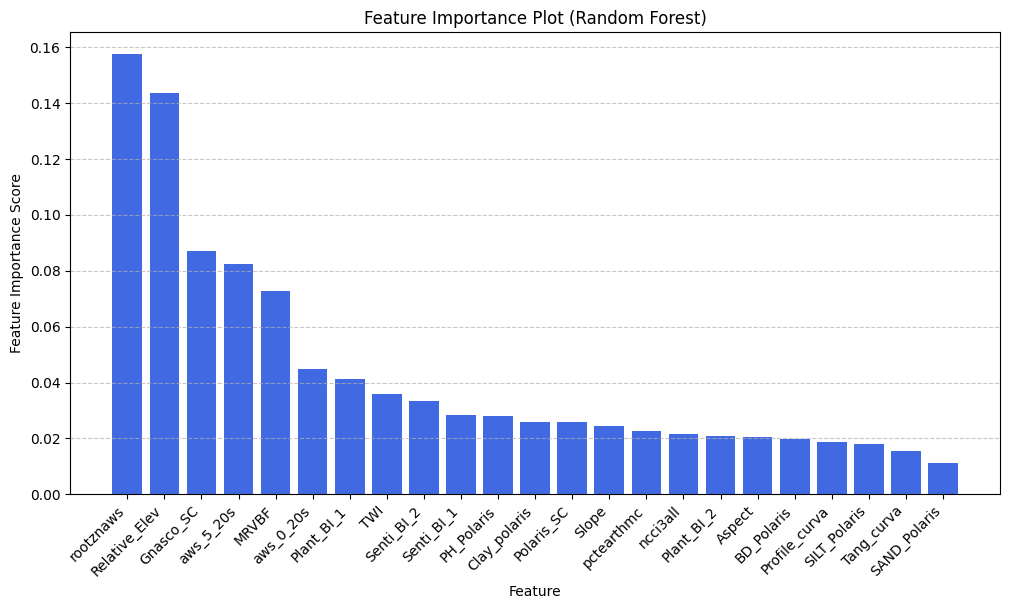

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM','SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Handle missing values in y
# Remove rows with NaN in 'OM' column:
df_m = df_m.dropna(subset=['OM'])

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #


# Initialize model
rf = RandomForestRegressor(random_state=42)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    rf.fit(X_train, y_train)

    # Predictions
    y_pred = rf.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: RandomForestRegressor")
print(f"Setup: {rf.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_rf = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})


# Extract feature importances
feature_importances = rf.feature_importances_
feature_names = X.columns  # Get the feature names

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Random Forest)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

WITH RFE Random forest

Selected Top 90% Features (20 out of 23):
['Relative_Elev', 'Slope', 'Aspect', 'Profile_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SILT_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s', 'aws_0_20s']
Model: RandomForestRegressor
Setup: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=0.0567, MAE=1.2676, RMSE=1.7548, R²=0.5482


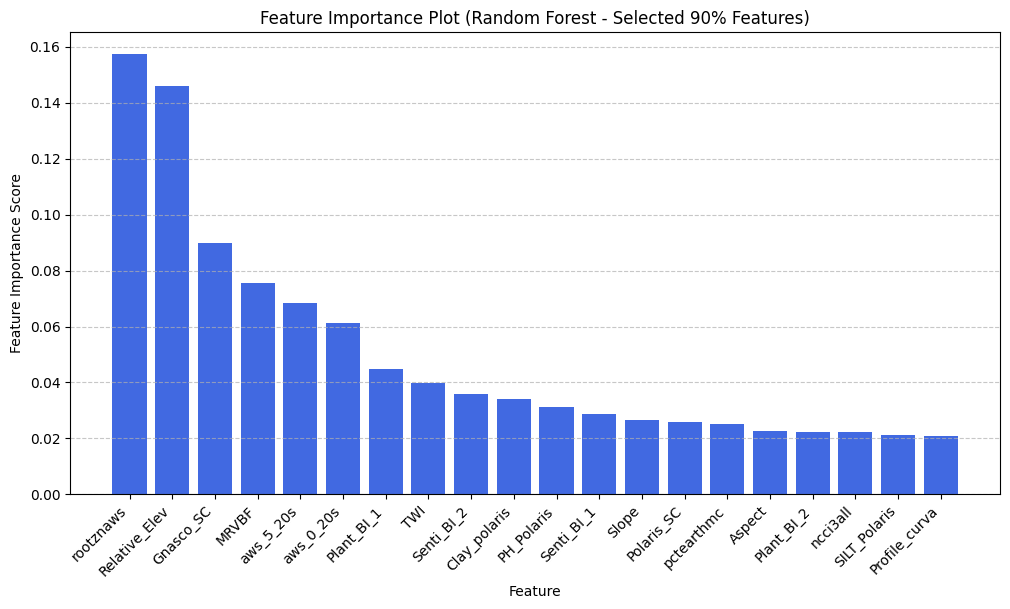

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM','SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.9 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=rf, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    rf.fit(X_train, y_train)

    # Predictions
    y_pred = rf.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: RandomForestRegressor")
print(f"Setup: {rf.get_params()}")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_rf_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances for the selected features
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Random Forest - Selected 90% Features)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

KNN

Model: KNeighborsRegressor
Setup: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
Average Metrics Across 10-Fold CV:
MBE=-0.1280, MAE=1.3602, RMSE=1.9098, R²=0.4362


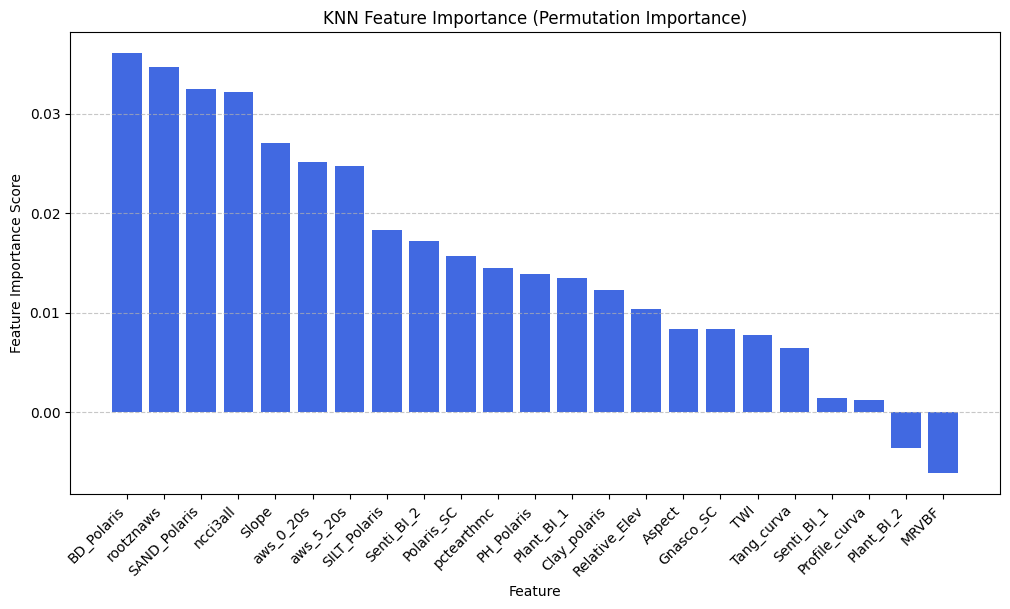

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

 # Now, remove rows with NaN values from both X and y:
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist()) # Make sure all columns in X are included.
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long'])
y = df_cleaned['OM']


# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize model
knn = KNeighborsRegressor(n_neighbors=10)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: KNeighborsRegressor")
print(f"Setup: {knn.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_knn = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})


# Compute feature importance using permutation importance
perm_importance = permutation_importance(knn, X_test, y_test, scoring='r2', n_repeats=10, random_state=42)

# Extract importance scores
feature_importance = perm_importance.importances_mean
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot feature importance with scores on the y-axis
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature')
plt.title('KNN Feature Importance (Permutation Importance)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

RFE kNN

Selected Top 90% Features (20 out of 23):
['Relative_Elev', 'PH_Polaris', 'MRVBF', 'Senti_BI_2', 'Aspect', 'Slope', 'Tang_curva', 'Profile_curva', 'Clay_polaris', 'SAND_Polaris', 'BD_Polaris', 'ncci3all', 'SILT_Polaris', 'Plant_BI_1', 'Plant_BI_2', 'Gnasco_SC', 'Polaris_SC', 'pctearthmc', 'Senti_BI_1', 'aws_0_20s']
Model: KNeighborsRegressor
Setup: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=-0.1501, MAE=1.3381, RMSE=1.8781, R²=0.4538


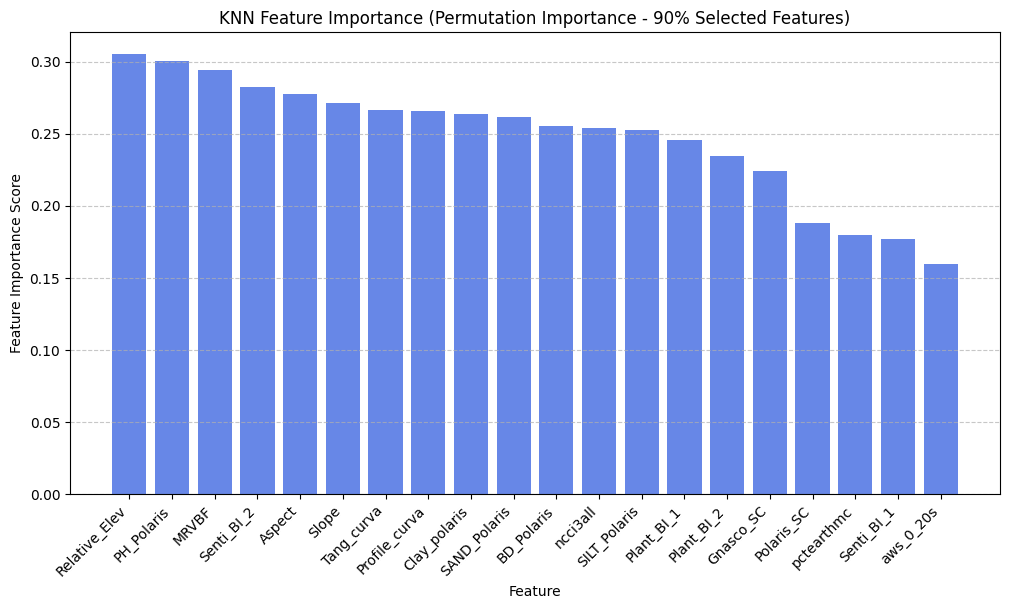

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Drop rows with NaN values in X and y
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())  # Make sure all columns in X are included.
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long'])
y = df_cleaned['OM']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize baseline KNN model for feature importance evaluation
knn_baseline = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='minkowski')

# Train KNN model on all features
knn_baseline.fit(X_scaled, y)

# Compute feature importance using permutation importance
perm_importance = permutation_importance(knn_baseline, X_scaled, y, scoring='r2', n_repeats=10, random_state=42)

# Extract importance scores and feature names
feature_importance = perm_importance.importances_mean
feature_names = X.columns

# Sort features by importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 90% most important features
num_features_to_select = int(0.9 * X.shape[1])
selected_features = feature_importance_df['Feature'].iloc[:num_features_to_select].tolist()
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features)

# Reduce X to selected features
X_selected = X[selected_features].values
X_selected_scaled = scaler.fit_transform(X_selected)  # Standardize selected features

# Initialize KNN model for final training and testing
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='minkowski')

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected_scaled):
    X_train, X_test = X_selected_scaled[train_index], X_selected_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: KNeighborsRegressor")
print(f"Setup: {knn.get_params()}")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_knn_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Plot feature importance with confidence intervals
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'][:num_features_to_select],
        feature_importance_df['Importance'][:num_features_to_select],
        color='royalblue', alpha=0.8)

plt.ylabel('Feature Importance Score')
plt.xlabel('Feature')
plt.title('KNN Feature Importance (Permutation Importance - 90% Selected Features)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

KSVM

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Kernelized Support Vector Machines (KSVM) with RBF kernel
ksvm = SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale')

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    ksvm.fit(X_train, y_train)

    # Predictions
    y_pred = ksvm.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Kernelized Support Vector Machines (KSVM) - RBF Kernel")
print(f"Setup: {ksvm.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_ksvm = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Feature Importance for Linear Kernel Only
if ksvm.kernel == 'linear':  # Fixed the variable reference
    feature_importances = np.abs(ksvm.coef_).flatten()  # Absolute values of coefficients
    feature_names = X.columns  # Feature names

    # Create DataFrame for visualization
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort descending

    # Plot Feature Importance
    plt.figure(figsize=(12, 6))
    plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
    plt.ylabel("Feature Importance Score (Absolute Coefficients)")
    plt.xlabel("Feature")
    plt.title("Feature Importance Plot (SVR with Linear Kernel)")
    plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Model: Kernelized Support Vector Machines (KSVM) - RBF Kernel
Setup: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Average Metrics Across 10-Fold CV:
MBE=-0.3042, MAE=1.3492, RMSE=1.9372, R²=0.4205


RFE KSVM

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM','SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Kernelized Support Vector Machines (KSVM) with RBF kernel
ksvm = SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale')

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.9 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=SVR(kernel='linear'), n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    ksvm.fit(X_train, y_train)

    # Predictions
    y_pred = ksvm.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Kernelized Support Vector Machines (KSVM) - RBF Kernel")
print(f"Setup: {ksvm.get_params()}")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_ksvm_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Feature Importance for Linear Kernel Only
if ksvm.kernel == 'linear':  # If using a linear kernel, extract feature importance
    feature_importances = np.abs(ksvm.coef_).flatten()  # Absolute values of coefficients
    feature_names = selected_features  # Only selected features

    # Create DataFrame for visualization
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort descending

    # Plot Feature Importance
    plt.figure(figsize=(12, 6))
    plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
    plt.ylabel("Feature Importance Score (Absolute Coefficients)")
    plt.xlabel("Feature")
    plt.title("Feature Importance Plot (SVR with Linear Kernel)")
    plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Selected Top 90% Features (20 out of 23):
['Relative_Elev', 'Slope', 'Aspect', 'Profile_curva', 'Tang_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SILT_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s', 'aws_0_20s']
Model: Kernelized Support Vector Machines (KSVM) - RBF Kernel
Setup: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=-0.3031, MAE=1.3486, RMSE=1.9387, R²=0.4193


GB

Model: Gradient Boosting Regressor
Setup: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Average Metrics Across 10-Fold CV:
MBE=0.0376, MAE=1.2929, RMSE=1.8011, R²=0.4951


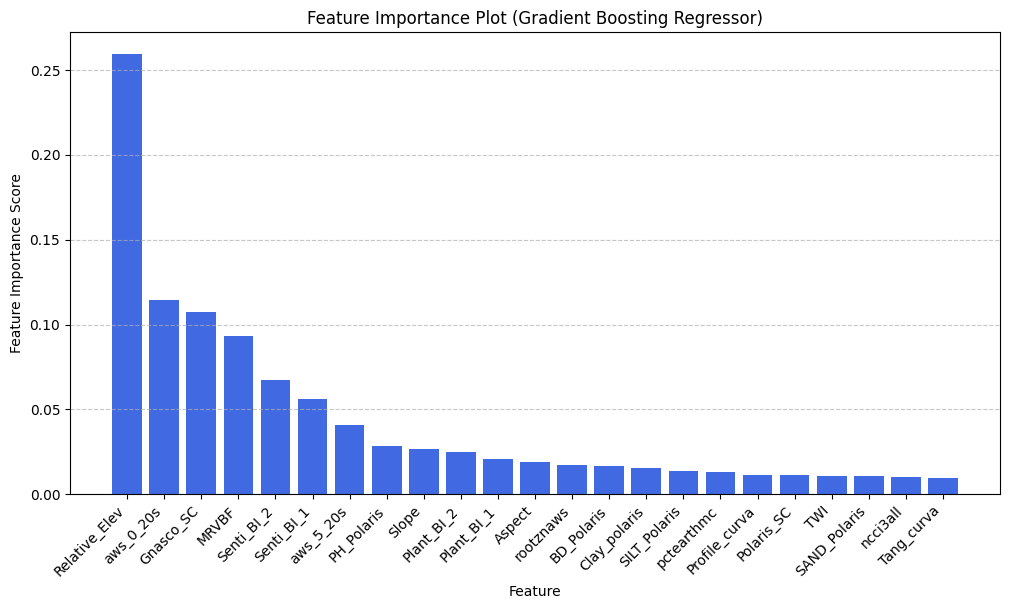

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM','SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Gradient Boosting Regressor (GBR)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    gbr.fit(X_train, y_train)

    # Predictions
    y_pred = gbr.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Gradient Boosting Regressor")
print(f"Setup: {gbr.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_gb = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances
feature_importances = gbr.feature_importances_
feature_names = X.columns  # Get the feature names

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Gradient Boosting Regressor)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


RFE GB

Selected Top 90% Features (20 out of 23):
['Relative_Elev', 'Slope', 'Aspect', 'Profile_curva', 'Tang_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SILT_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s', 'aws_0_20s']
Model: Gradient Boosting Regressor
Setup: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=0.0568, MAE=1.2981, RMSE=1.8044, R²=0.4925


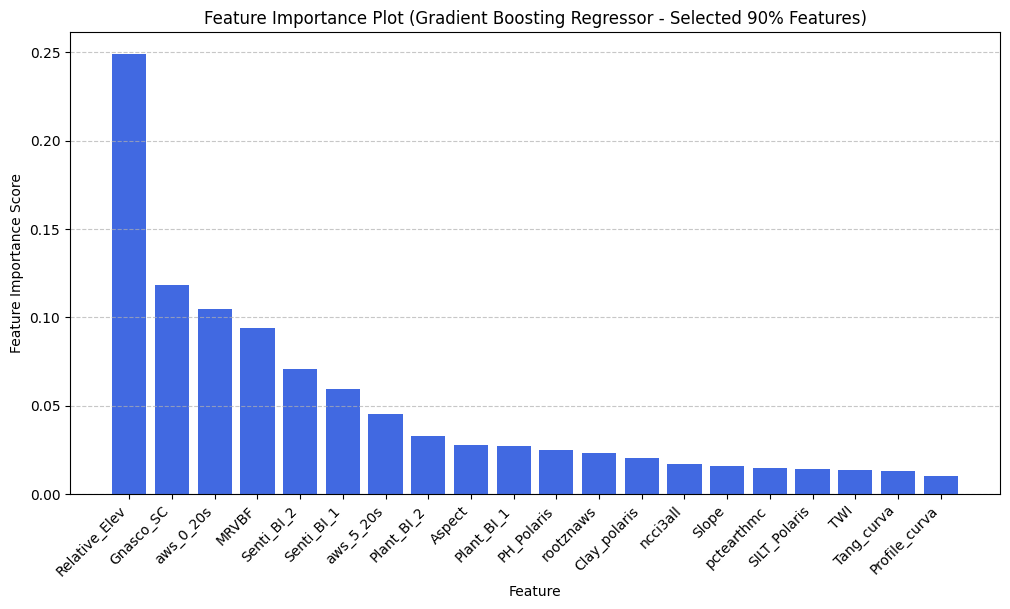

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Gradient Boosting Regressor (GBR)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.9 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=gbr, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    gbr.fit(X_train, y_train)

    # Predictions
    y_pred = gbr.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Gradient Boosting Regressor")
print(f"Setup: {gbr.get_params()}")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_gb_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances for the selected features
feature_importances = gbr.feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Gradient Boosting Regressor - Selected 90% Features)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

DT

Model: Decision Tree Regressor
Setup: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Average Metrics Across 10-Fold CV:
MBE=-0.0689, MAE=1.6291, RMSE=2.3844, R²=0.1187


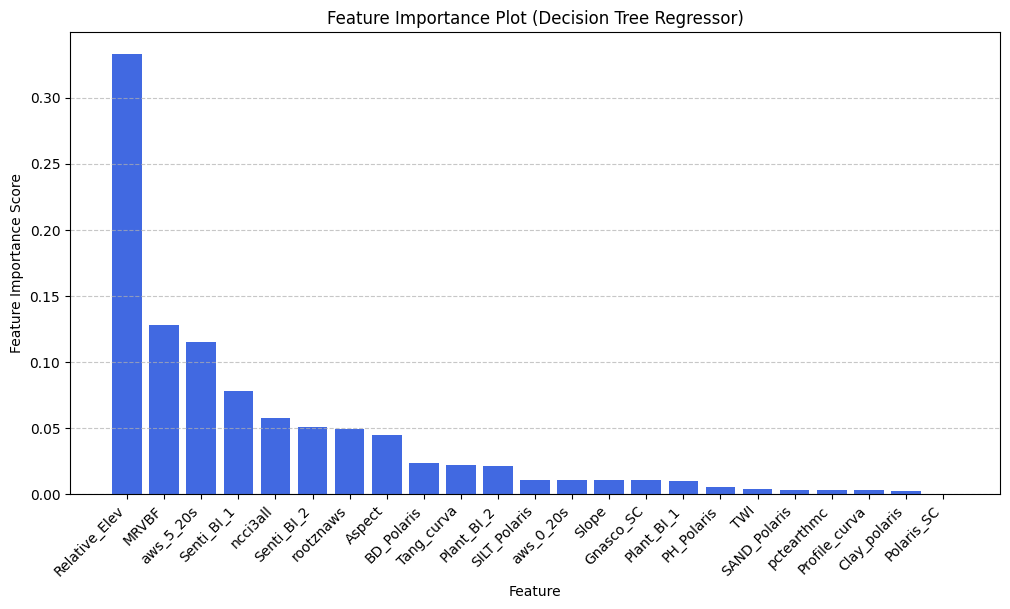

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42, max_depth=10)  # Adjust max_depth for better performance

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    dt.fit(X_train, y_train)

    # Predictions
    y_pred = dt.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Decision Tree Regressor")
print(f"Setup: {dt.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_dt = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances
feature_importances = dt.feature_importances_
feature_names = X.columns  # Get the feature names

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Decision Tree Regressor)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

With RFE DT

Selected Top 90% Features (20 out of 23):
['Relative_Elev', 'Slope', 'Aspect', 'Profile_curva', 'Tang_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'SAND_Polaris', 'BD_Polaris', 'PH_Polaris', 'pctearthmc', 'ncci3all', 'aws_5_20s', 'aws_0_20s']
Model: Decision Tree Regressor
Setup: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=0.0451, MAE=1.6254, RMSE=2.3533, R²=0.1446


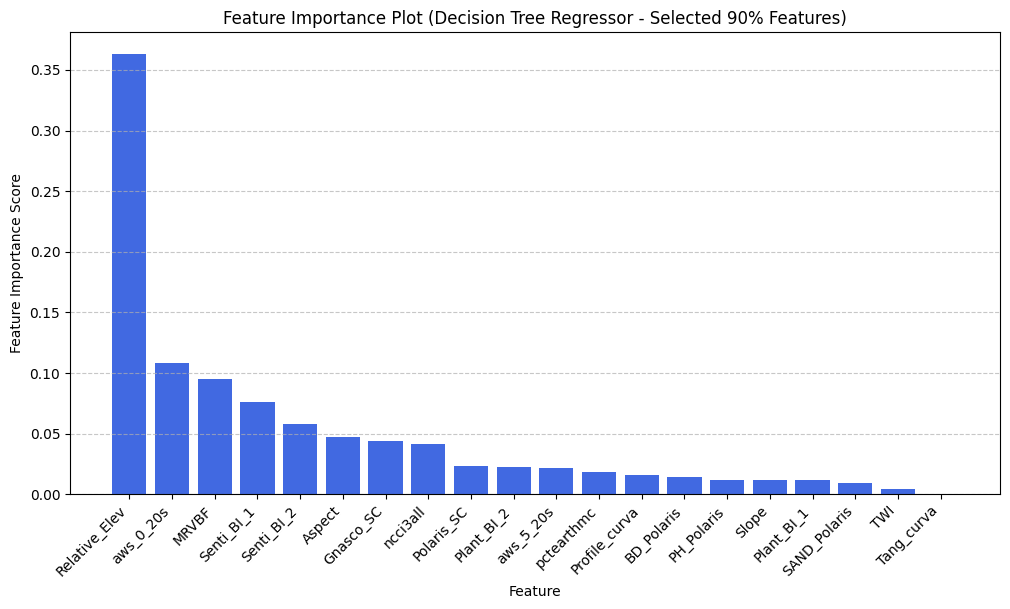

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42, max_depth=10)  # Adjust max_depth for better performance

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.9 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=dt, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    dt.fit(X_train, y_train)

    # Predictions
    y_pred = dt.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Decision Tree Regressor")
print(f"Setup: {dt.get_params()}")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_dt_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances for the selected features
feature_importances = dt.feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Decision Tree Regressor - Selected 90% Features)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

XGBOOST

Model: XGBRegressor
Setup: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 10, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Average Metrics Across 10-Fold CV:
MBE=-0.0101, MAE=1.3063, RMSE=1.8310, R²=0.

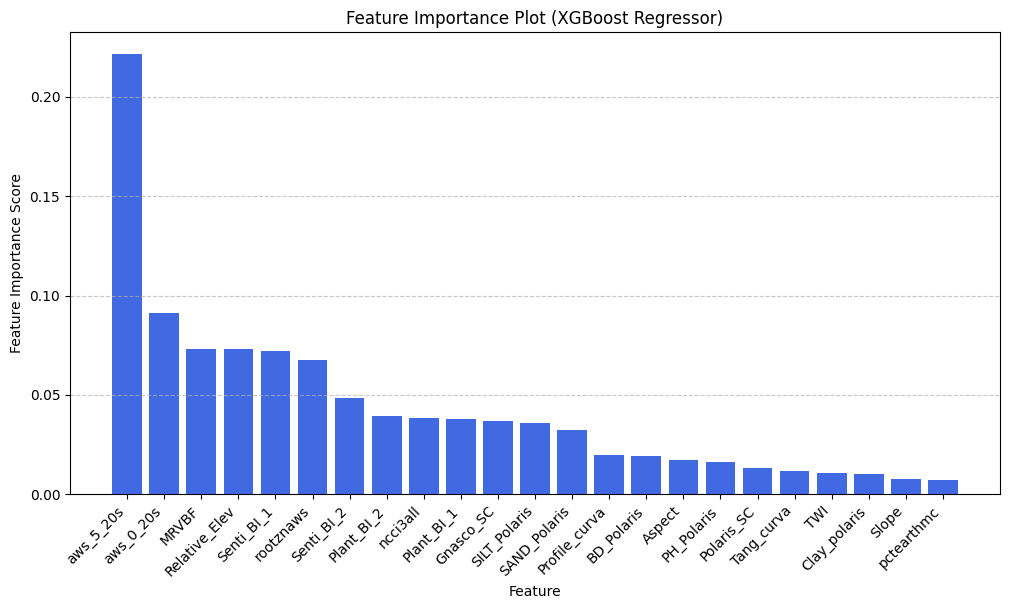

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize XGBoost Regressor
xgb = XGBRegressor(random_state=42, max_depth=10, n_estimators=100, learning_rate=0.1)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    xgb.fit(X_train, y_train)

    # Predictions
    y_pred = xgb.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: XGBRegressor")
print(f"Setup: {xgb.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_xgb = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances
feature_importances = xgb.feature_importances_
feature_names = X.columns  # Get the feature names

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (XGBoost Regressor)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

WITH RFE XGBOOST

Selected Top 90% Features (20 out of 23):
['Relative_Elev', 'Aspect', 'Profile_curva', 'Tang_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'SAND_Polaris', 'SILT_Polaris', 'BD_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s']
Model: XGBRegressor
Setup: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 10, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs

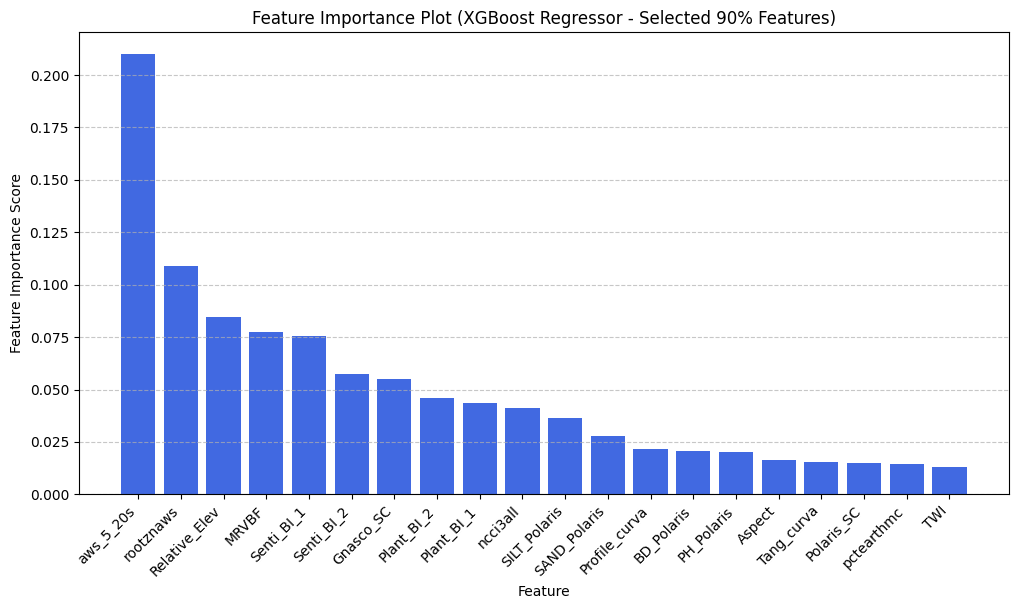

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM','SAMPLEDATE','Elevation','lati','long' ])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize XGBoost Regressor
xgb = XGBRegressor(random_state=42, max_depth=10, n_estimators=100, learning_rate=0.1)

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.9 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=xgb, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    xgb.fit(X_train, y_train)

    # Predictions
    y_pred = xgb.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: XGBRegressor")
print(f"Setup: {xgb.get_params()}")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_xgb_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances for the selected features
feature_importances = xgb.feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (XGBoost Regressor - Selected 90% Features)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

LIGHT GBM

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[104]	cv_agg's valid rmse: 1.84687 + 0.212464
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[65]	valid_0's rmse: 1.72004
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	cv_agg's valid rmse: 1.82957 + 0.0814735
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[69]	valid_0's rmse: 1.8156
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[125]	cv_agg's valid rmse: 1.89405 + 0.109203
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[80]	valid_0's rmse: 1.71097
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[92]	cv_agg's valid rmse: 1.85599 + 0.156621
Training until valid

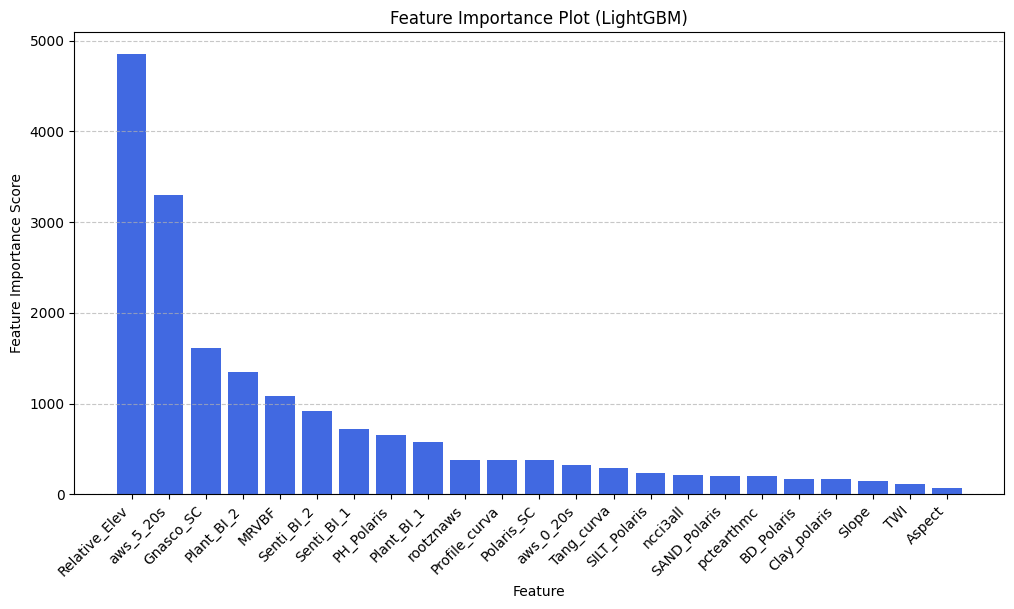

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features (optional for LightGBM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define LightGBM parameters
params = {
    'objective': 'regression',  # Regression task
    'metric': 'rmse',  # Root Mean Squared Error
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,  # Number of leaves in a tree
    'learning_rate': 0.05,  # Learning rate
    'feature_fraction': 0.9,  # Fraction of features to use for each tree
    'bagging_fraction': 0.8,  # Fraction of data to use for each tree
    'bagging_freq': 5,  # Frequency for bagging
    'verbose': -1,  # Suppress output
    'random_state': 42,  # Random seed for reproducibility
}

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Convert data into LightGBM Dataset format
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    # Perform LightGBM cross-validation to determine optimal boosting rounds
    cv_results = lgb.cv(
        params,
        train_data,
        num_boost_round=1000,
        nfold=5,  # Inner 5-fold CV
        stratified=False,
        metrics='rmse',
        seed=42,
        return_cvbooster=True,
        callbacks=[lgb.early_stopping(stopping_rounds=50)],
    )

    # Extract the best number of boosting rounds
    best_num_boost_rounds = len(cv_results['valid rmse-mean'])

    # Train final model on the fold
    model = lgb.train(
        params,
        train_data,
        num_boost_round=best_num_boost_rounds,
        valid_sets=[test_data],
        callbacks=[lgb.early_stopping(stopping_rounds=50)],
    )

    # Predict on test set
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: LightGBM")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_lgb = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances
feature_importances = model.feature_importance(importance_type='gain')
feature_names = X.columns

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (LightGBM)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

RFE LIGHT GBM

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Selected Top 90% Features (20 out of 23):
['Relative_Elev', 'Aspect', 'Profile_curva', 'Tang_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris', 'BD_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Model: LightGBM Regressor
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=0.0017, MAE=1.2836, RMSE=1.7592, R²=0.5213


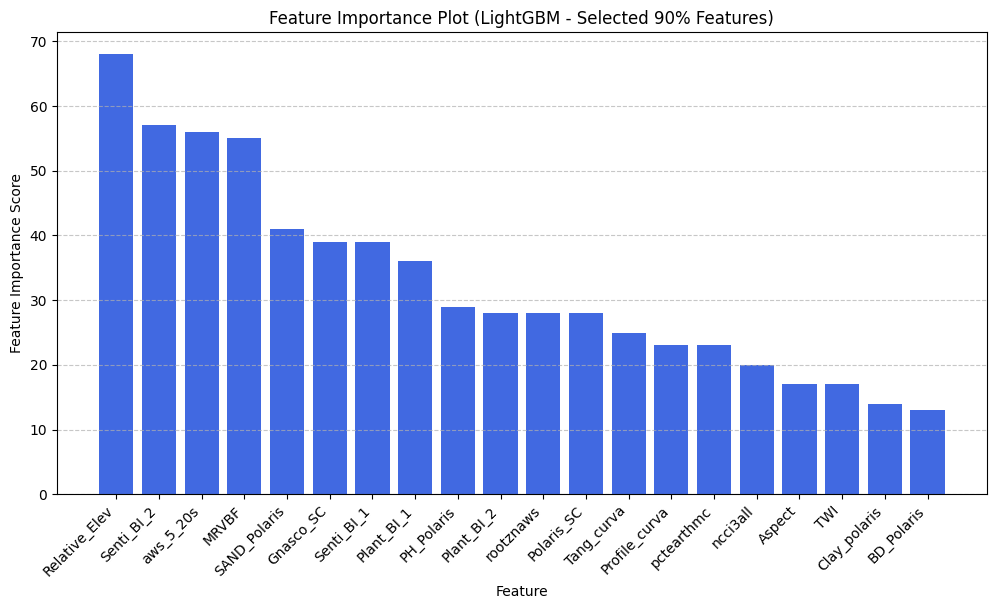

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features (optional for LightGBM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize LightGBM Regressor
lgb_regressor = lgb.LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=5,
    random_state=42
)

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.9 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=lgb_regressor, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train LightGBM model with early stopping
    lgb_regressor.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='rmse',  # Evaluation metric
        callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]
    )

    # Predictions
    y_pred = lgb_regressor.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: LightGBM Regressor")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_lgb_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances for the selected features
feature_importances = lgb_regressor.feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (LightGBM - Selected 90% Features)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Stackinig Regressor

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long' ])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Base Models for Stacking
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)  # Added GBR

# Define Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('knn', knn),
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('gbr', gbr)  # Added GBR to the stacking model
    ],
    final_estimator=RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    cv=5
)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Stacking Model
    stacking_model.fit(X_train, y_train)

    # Predictions
    y_pred = stacking_model.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: StackingRegressor")
print(f"Setup: {stacking_model.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_sr = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Model: StackingRegressor
Setup: {'cv': 5, 'estimators': [('rf', RandomForestRegressor(max_depth=10, random_state=42)), ('knn', KNeighborsRegressor()), ('xgb', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)), ('lgbm', LGBMRegressor(max_depth=5, random_state=42)), ('gbr', GradientBoostingRegressor(max_depth=

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


WiTH RFE STACKING REGRESSOR

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM',  'SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Base model for feature selection
feature_selector_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.9 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=feature_selector_model, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Base Models for Stacking
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Define Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('knn', knn),
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('gbr', gbr)
    ],
    final_estimator=RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    cv=5
)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Stacking Model
    stacking_model.fit(X_train, y_train)

    # Predictions
    y_pred = stacking_model.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: StackingRegressor")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_sr_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

Selected Top 90% Features (20 out of 23):
['Relative_Elev', 'Aspect', 'Profile_curva', 'Tang_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'SILT_Polaris', 'BD_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s', 'aws_0_20s']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Model: StackingRegressor
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=-0.1097, MAE=1.4119, RMSE=1.9169, R²=0.4332


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


DEEP NEURAL NETWORK

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM',  'SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X


# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define function to build the DNN model
def build_dnn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build and train the DNN model
    dnn = build_dnn(X_train.shape[1])
    dnn.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.1)

    # Predict on test set
    y_pred = dnn.predict(X_test).flatten()

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Deep Neural Network (DNN)")
print(f"Setup: {'Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)'}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_dnn = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 406ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Model: Deep Neural Network (DNN)
Setup: Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)
Average Metrics Across 10-Fold CV:
MBE=-0.0535, MAE=1.6079, RMSE=2.1324, R²=0.2857


WITH RFE DEEP NEURAL NETWORK

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor  # For feature selection

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM',  'SAMPLEDATE','Elevation','lati','long' ])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X


# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using RFE with RandomForestRegressor
feature_selector = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.9 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=feature_selector, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Define function to build the DNN model
def build_dnn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build and train the DNN model
    dnn = build_dnn(X_train.shape[1])
    dnn.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.1)

    # Predict on test set
    y_pred = dnn.predict(X_test).flatten()

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Deep Neural Network (DNN)")
print(f"Setup: {'Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)'}")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_dnn_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

Selected Top 90% Features (20 out of 23):
['Relative_Elev', 'Aspect', 'Profile_curva', 'Tang_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'SILT_Polaris', 'BD_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s', 'aws_0_20s']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Model: Deep Neural Network (DNN)
Setup: Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=0.0165, MAE=1.5815, RMSE=2.0979, R²=0.3124


ARTIFICAL NEURAL NETWORK

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM',  'SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X


# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define function to build the ANN model
def build_ann(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build and train the ANN model
    ann = build_ann(X_train.shape[1])
    ann.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.1)

    # Predict on test set
    y_pred = ann.predict(X_test).flatten()

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Artificial Neural Network (ANN)")
print(f"Setup: {'Dense(128, ReLU) -> Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)'}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_ann = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Model: Artificial Neural Network (ANN)
Setup: Dense(128, ReLU) -> Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)
Average Metrics Across 10-Fold CV:
MBE=-0.0547, MAE=1.5917, RMSE=2.1368, R²=0.2895


WITH RFE ANN

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor  # For feature selection

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long' ])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X


# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using RFE with RandomForestRegressor
feature_selector = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.9 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=feature_selector, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Define function to build the ANN model
def build_ann(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build and train the ANN model
    ann = build_ann(X_train.shape[1])
    ann.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.1)

    # Predict on test set
    y_pred = ann.predict(X_test).flatten()

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Artificial Neural Network (ANN)")
print(f"Setup: {'Dense(128, ReLU) -> Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)'}")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_ann_rfe = pd.DataFrame({
    'Actual ': y_test.values,
    'Predicted ': y_pred
})

Selected Top 90% Features (20 out of 23):
['Relative_Elev', 'Aspect', 'Profile_curva', 'Tang_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'SILT_Polaris', 'BD_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s', 'aws_0_20s']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Model: Artificial Neural Network (ANN)
Setup: Dense(128, ReLU) -> Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=0.0626, MAE=1.5453, RMSE=2.0572, R²=0.3436


PLOTTING

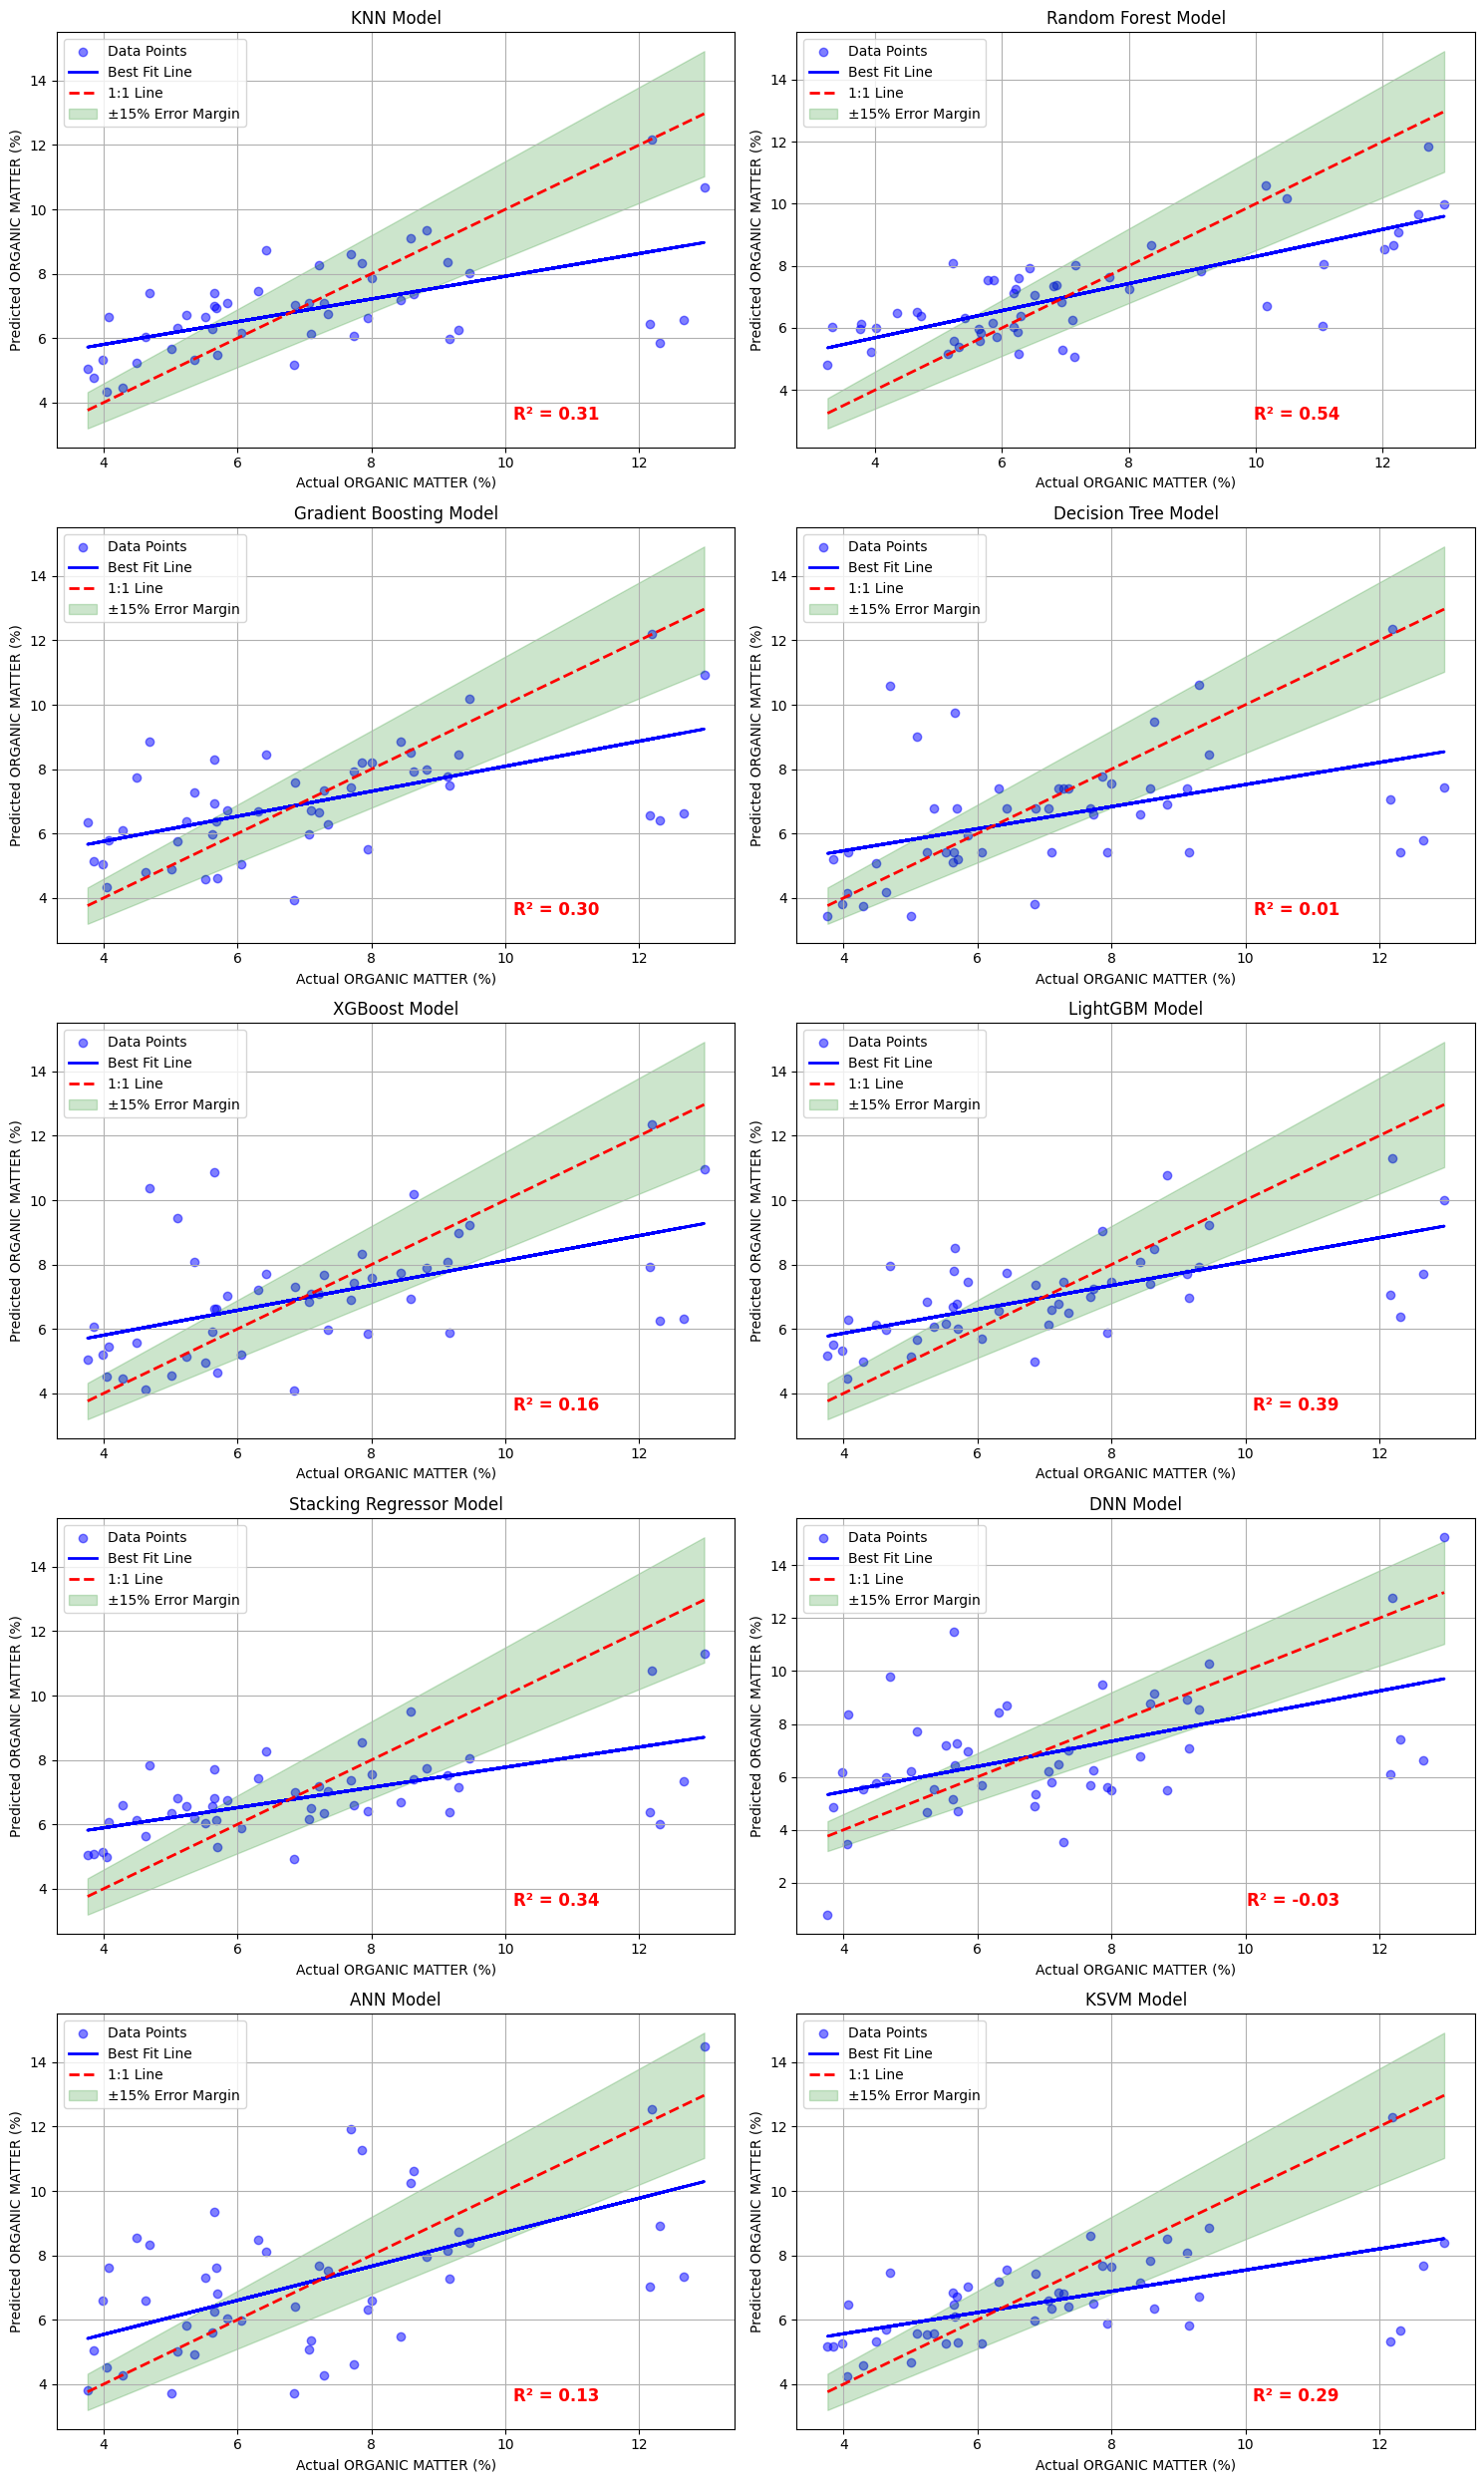

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Define a function to create scatter plots for each model with best-fit line, 1:1 line, and ±20% shaded area
def plot_scatter(df_dict):
    num_models = len(df_dict)

    # Determine number of rows and columns for subplots dynamically
    rows = (num_models // 2) + (num_models % 2)  # 2 plots per row
    cols = 2 if num_models > 1 else 1  # Use 1 column if only 1 model

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten() if num_models > 1 else [axes]  # Handle single plot


    # Iterate through each model and plot
    for i, (name, df) in enumerate(df_dict.items()):
        # Access the correct column names for actual and predicted values
        actual_col = 'Actual Yield'  # Use 'Actual Yield' if available, otherwise fallback to 'Actual OM'
        predicted_col = 'Predicted Yield'  # Use 'Predicted Yield' if available, otherwise fallback to 'Predicted OM'

        if 'Actual OM' in df.columns:
            actual_col = 'Actual OM'
        if 'Predicted OM' in df.columns:
            predicted_col = 'Predicted OM'

    # Iterate through each model and plot
    for i, (name, df) in enumerate(df_dict.items()):

        # Scatter plot of actual vs predicted yields
        axes[i].scatter(df[actual_col], df[predicted_col], color='blue', alpha=0.5, label='Data Points')

        # Best-fit regression line
        X_actual = df[actual_col].values.reshape(-1, 1)
        y_predicted = df[predicted_col].values
        reg = LinearRegression().fit(X_actual, y_predicted)
        best_fit_y = reg.predict(X_actual)
        axes[i].plot(df[actual_col], best_fit_y, color='blue', lw=2, linestyle='-', label='Best Fit Line')

        # Plot the 1:1 line (perfect prediction line)
        min_val, max_val = min(df[actual_col]), max(df[actual_col])
        axes[i].plot([min_val, max_val], [min_val, max_val], color='red', lw=2, linestyle='--', label='1:1 Line')

        # Add shaded ±20% error margin area
        axes[i].fill_between([min_val, max_val],
                             [min_val * 1.15, max_val * 1.15],
                             [min_val * 0.85, max_val * 0.85],
                             color='green', alpha=0.2, label='±15% Error Margin')

        # Calculate R² value
        r2 = r2_score(df[actual_col], df[predicted_col])

        # Set title with R² value
        axes[i].set_title(f'{name} Model')

        # Display R² score in the top right corner with custom text style
        axes[i].text(0.80, 0.10, f'R² = {r2:.2f}', transform=axes[i].transAxes,
                     ha='right', va='top', fontsize=12, color='red', weight='bold')

        # Labels, grid, and legend
        axes[i].set_xlabel('Actual ORGANIC MATTER (%)')
        axes[i].set_ylabel('Predicted ORGANIC MATTER (%)')
        axes[i].grid(True)
        axes[i].legend()

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Create a dictionary to store DataFrames for each model
df_dict = {
    'KNN': df_knn,
    'Random Forest': df_rf,
    'Gradient Boosting': df_gb,
    'Decision Tree': df_dt,
    'XGBoost': df_xgb,
    'LightGBM': df_lgb,
    'Stacking Regressor': df_sr,
    'DNN': df_dnn,
    'ANN': df_ann,
    'KSVM': df_ksvm  # Added Kernelized Support Vector Machines (KSVM)
}

# Now call the plot function to generate the scatter plots for all models
plot_scatter(df_dict)